In [7]:
import torch
from torch_geometric.data import Data
import pandas as pd
import numpy as np

# Load the necessary files
sector_kpis_df = pd.read_csv('D:/pyproject/github/ML_based-Pro-LTE-Opt/Data/Merged_NBR_Uti_Study_LTE_Data-Ardebil_processed.csv')
cell_config_df = pd.read_csv('D:/pyproject/github/ML_based-Pro-LTE-Opt/Data/LST CELL+Display static parameters of cells-ardebil-.csv')

# Example: Aggregate data to sector-level features (e.g., average utilization, risk score)
sector_features = sector_kpis_df.groupby('Source')[['ACTIVE_UE_DL', 'MAX_BEARABLE_USERS', 'Suitability Score NBR1']].mean()

# Create a mapping for sector names to indices
sector_name_to_idx = {name: idx for idx, name in enumerate(sector_features.index)}

# Create a list for edges (sector to sector relationships based on neighbor relations)
edges = []
edge_features = []

# Create edges based on the neighbor relationship in the data
for _, row in sector_kpis_df.iterrows():
    source_sector = row['Source']
    target_sector = row['Targets NBR1']  # Assuming 'Targets NBR1' is the neighbor's sector

    # Get corresponding indices of sectors in the sector-level features DataFrame
    source_idx = sector_name_to_idx.get(source_sector, -1)
    target_idx = sector_name_to_idx.get(target_sector, -1)

    # Ensure valid index for both source and target
    if source_idx != -1 and target_idx != -1:
        edges.append([source_idx, target_idx])
        # Edge features: Example: Suitability Score
        edge_features.append([row['Suitability Score NBR1']])

# Convert the edge list and edge features to tensors
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(edge_features, dtype=torch.float)

# Node features: Use the sector-level aggregated data
node_features = torch.tensor(sector_features.values, dtype=torch.float)

# Create the graph data for PyTorch Geometric
graph_data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr)

# Save the graph data to a file
torch.save(graph_data, 'D:/pyproject/github/ML_based-Pro-LTE-Opt/Output/sector_level_graph.pt')

print("Graph construction complete. Saved as 'sector_level_graph.pt'.")


Graph construction complete. Saved as 'sector_level_graph.pt'.


In [2]:
pip install torch_geometric

Note: you may need to restart the kernel to use updated packages.


In [7]:
import torch
from torch_geometric.data import Data
import torch_geometric

# Add safe global for DataEdgeAttr
torch.serialization.add_safe_globals([torch_geometric.data.data.DataEdgeAttr])

# Load the saved graph data (use `weights_only=False` to load the entire data object)
graph_data = torch.load('D:/pyproject/github/ML_based-Pro-LTE-Opt/Output/sector_level_graph.pt', weights_only=False)

# Now you can use the graph_data object
print("Graph loaded successfully.")

# Optionally, if you want to view or manipulate the graph data:
print(graph_data)


Graph loaded successfully.
Data(x=[784, 3], edge_index=[2, 626], edge_attr=[626, 1])


import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Convert the PyTorch Geometric graph to a NetworkX graph
G = to_networkx(graph_data, to_undirected=True)

# Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
plt.title("Sector-Level Graph")
plt.show()


In [ ]:
import torch
from torch_geometric.data import Data
import torch_geometric

# Add safe global for DataEdgeAttr
torch.serialization.add_safe_globals([torch_geometric.data.data.DataEdgeAttr])

# Load the saved graph data (use `weights_only=False` to load the entire data object)
graph_data = torch.load('D:/pyproject/github/ML_based-Pro-LTE-Opt/Output/sector_level_graph.pt', weights_only=False)

# Now you can use the graph_data object
print("Graph loaded successfully.")

# Optionally, if you want to view or manipulate the graph data:
print(graph_data)


Graph loaded successfully.
Data(x=[784, 3], edge_index=[2, 626], edge_attr=[626, 1])


In [17]:
import torch
from torch_geometric.data import Data
import torch_geometric

# Add safe global for DataEdgeAttr
torch.serialization.add_safe_globals([torch_geometric.data.data.DataEdgeAttr])

# Load the saved graph data (use `weights_only=False` to load the entire data object)
graph_data = torch.load('D:/pyproject/github/ML_based-Pro-LTE-Opt/Output/sector_level_graph.pt', weights_only=False)

# Now you can use the graph_data object
print("Graph loaded successfully.")

# Optionally, if you want to view or manipulate the graph data:
print(graph_data)


Graph loaded successfully.
Data(x=[784, 3], edge_index=[2, 626], edge_attr=[626, 1])


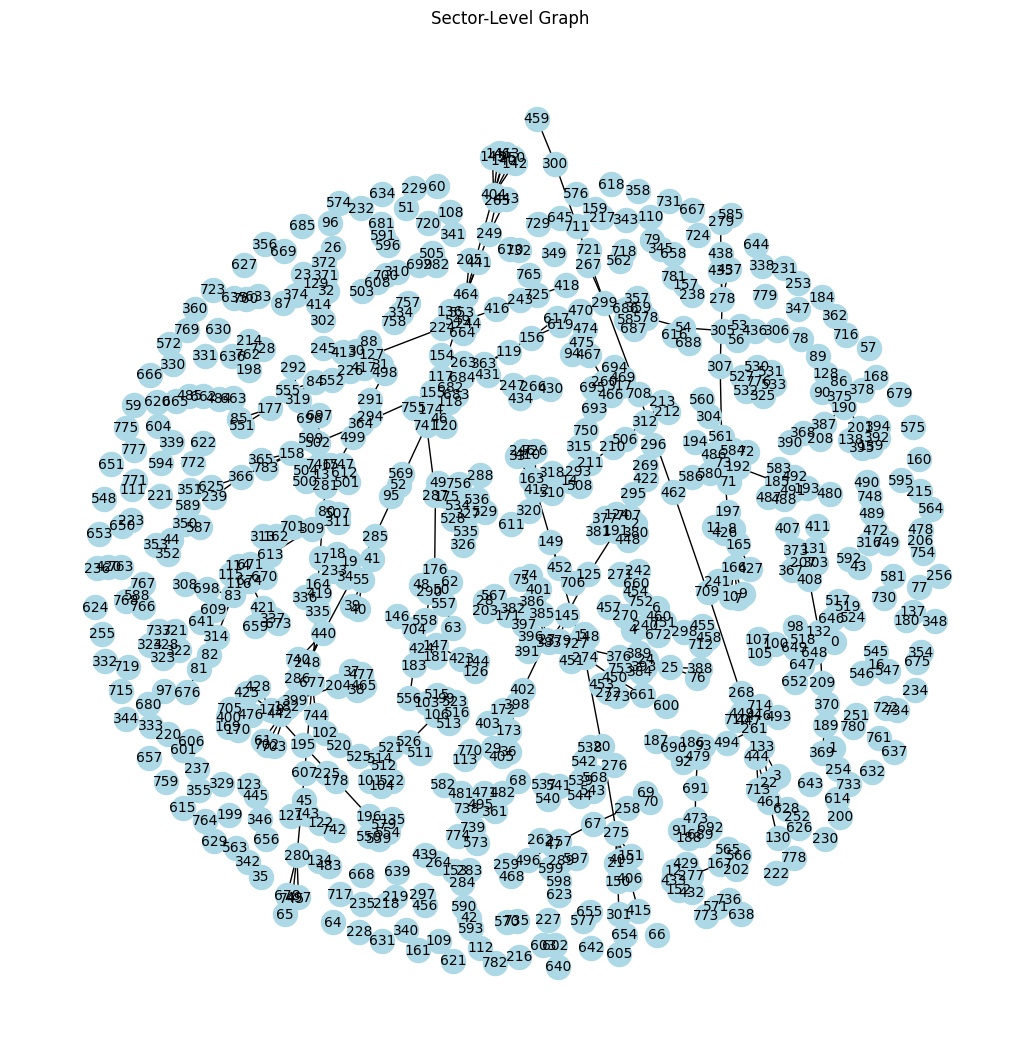

Data(x=[784, 3], edge_index=[2, 626], edge_attr=[626, 1])


In [ ]:
 mport networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Convert the PyTorch Geometric graph to a NetworkX graph
G = to_networkx(graph_data, to_undirected=True)

# Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=300,node_color='lightblue', font_size=10)
plt.title("Sector-Level Graph")
plt.show()

print(graph_data)


In [20]:
# Load the graph with weights_only=True (if only weights are needed)
graph_data = torch.load('D:/pyproject/github/ML_based-Pro-LTE-Opt/Output/sector_level_graph.pt', weights_only=False)

# Now you can use the graph_data object
print("Graph loaded successfully.")


Graph loaded successfully.


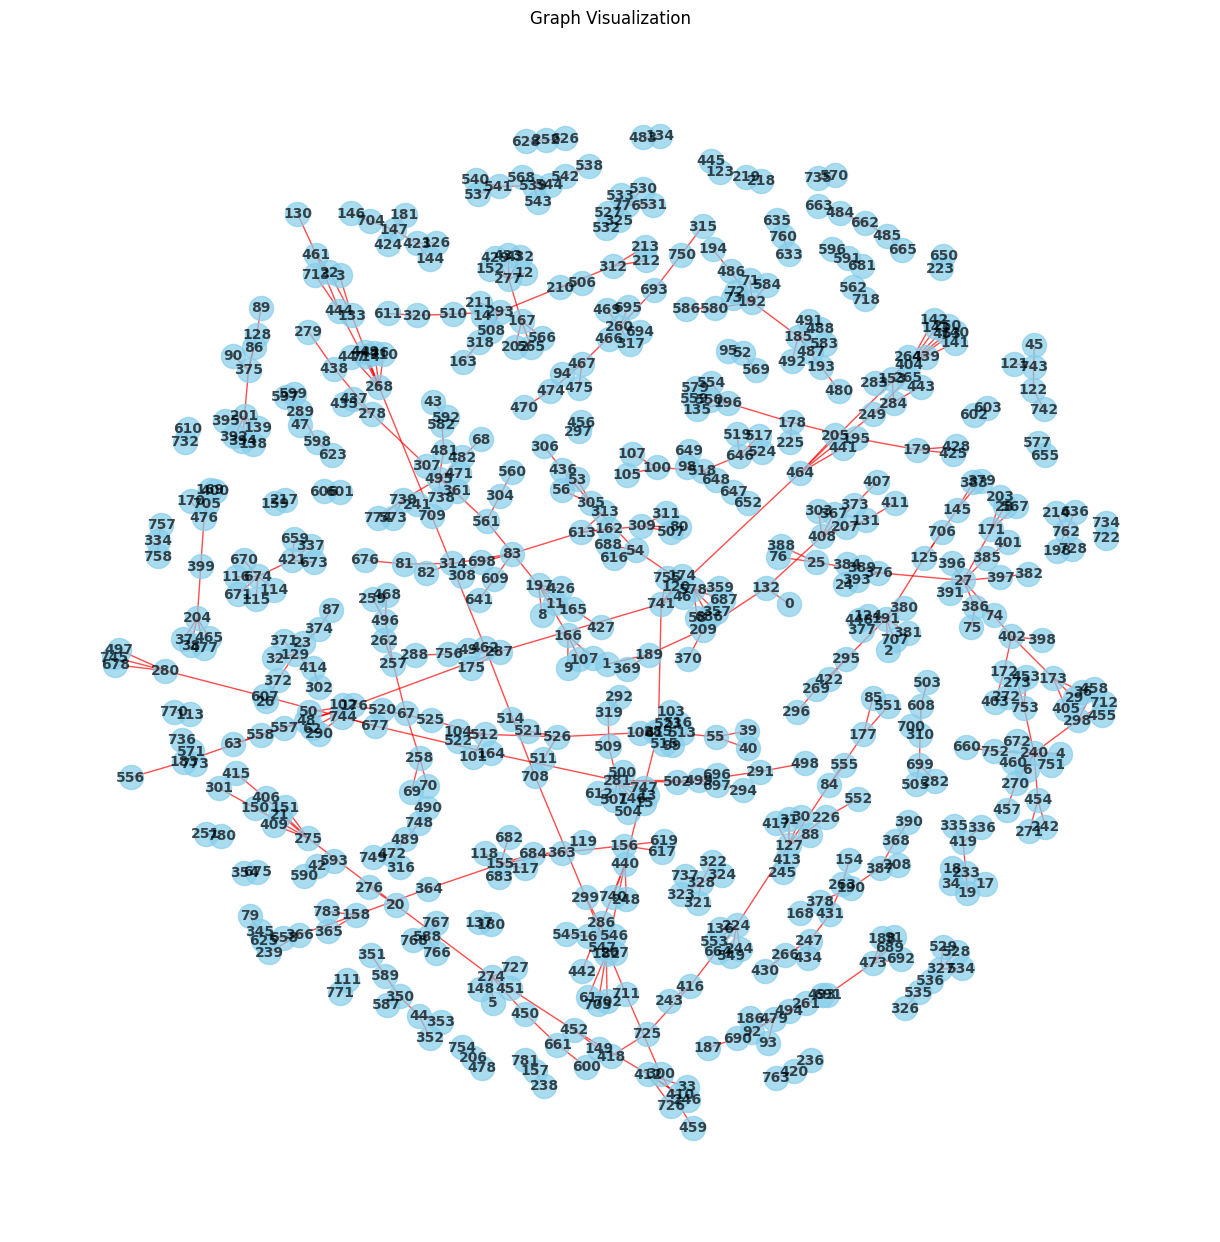

In [22]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data

# Load the graph data (full graph with node features, edge index, and edge attributes)
graph_data = torch.load('D:/pyproject/github/ML_based-Pro-LTE-Opt/Output/sector_level_graph.pt', weights_only=False)

# Convert the torch_geometric graph to a NetworkX graph
edge_index = graph_data.edge_index.numpy()  # Get edge index from graph_data
edges = edge_index.T  # Transpose to get proper format (source, target)

# Create NetworkX graph
G = nx.Graph()
G.add_edges_from(edges)

# Add node features (if applicable, for example, using node features as node labels)
node_features = graph_data.x.numpy()  # Get node features from graph_data
node_labels = {i: f"Node {i}" for i in range(len(node_features))}

# Visualize the graph
plt.figure(figsize=(12, 12))

# Draw the graph with node labels and edge labels (if needed)
nx.draw(G, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', alpha=0.7, edge_color='red')

# Show the plot
plt.title('Graph Visualization')
plt.show()


In [40]:
pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [41]:
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the CSV file
df = pd.read_csv('D:/pyproject/github/ML_based-Pro-LTE-Opt/Data/Sectors_with_Target_NBR_Cells.csv')

# Clean column names
df.columns = [col.strip() for col in df.columns]

# Node features
sector_features_columns = [
    'ACTIVE_UE_DL', 'MAX_BEARABLE_USERS', 'UDCLI', 'PAYLOAD_PDCP_DL_GBYTE',
    'RB_UTILIZATION_DL', 'THRPUT_UE_DL', 'Number_of_Neighbors',
    'Source Longitude', 'Source Latitude', 'Source Height (m)',
    'Source Azimuth', 'Source Mechanical Downtilt'
]
node_features_df = df[sector_features_columns]

# Create index for each sector
sector_names = df['Source'].unique()
sector_to_index = {name: idx for idx, name in enumerate(sector_names)}
df['Source_Index'] = df['Source'].map(sector_to_index)

# Edge connections and attributes
edge_index = []
edge_attr = []

for i, row in df.iterrows():
    source_idx = row['Source_Index']
    for j in range(1, 10):
        target_sector = row.get(f'Targets NBR{j}')
        if pd.isna(target_sector) or target_sector not in sector_to_index:
            continue
        target_idx = sector_to_index[target_sector]
        edge_index.append([source_idx, target_idx])
        edge_attr.append([
            row.get(f'Utilizations NBR{j}', 0),
            row.get(f'UDCLIs NBR{j}' if j <= 8 else None, 0),
            row.get(f'Distances NBR{j}', 0)
        ])

# Convert to torch tensors
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(edge_attr, dtype=torch.float)

# Normalize node features
scaler = StandardScaler()
x = torch.tensor(scaler.fit_transform(node_features_df), dtype=torch.float)

# Build graph
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)

# Save graph
torch.save(data, 'sector_level_graph.pt')
print("Graph successfully saved.")



Graph successfully saved.


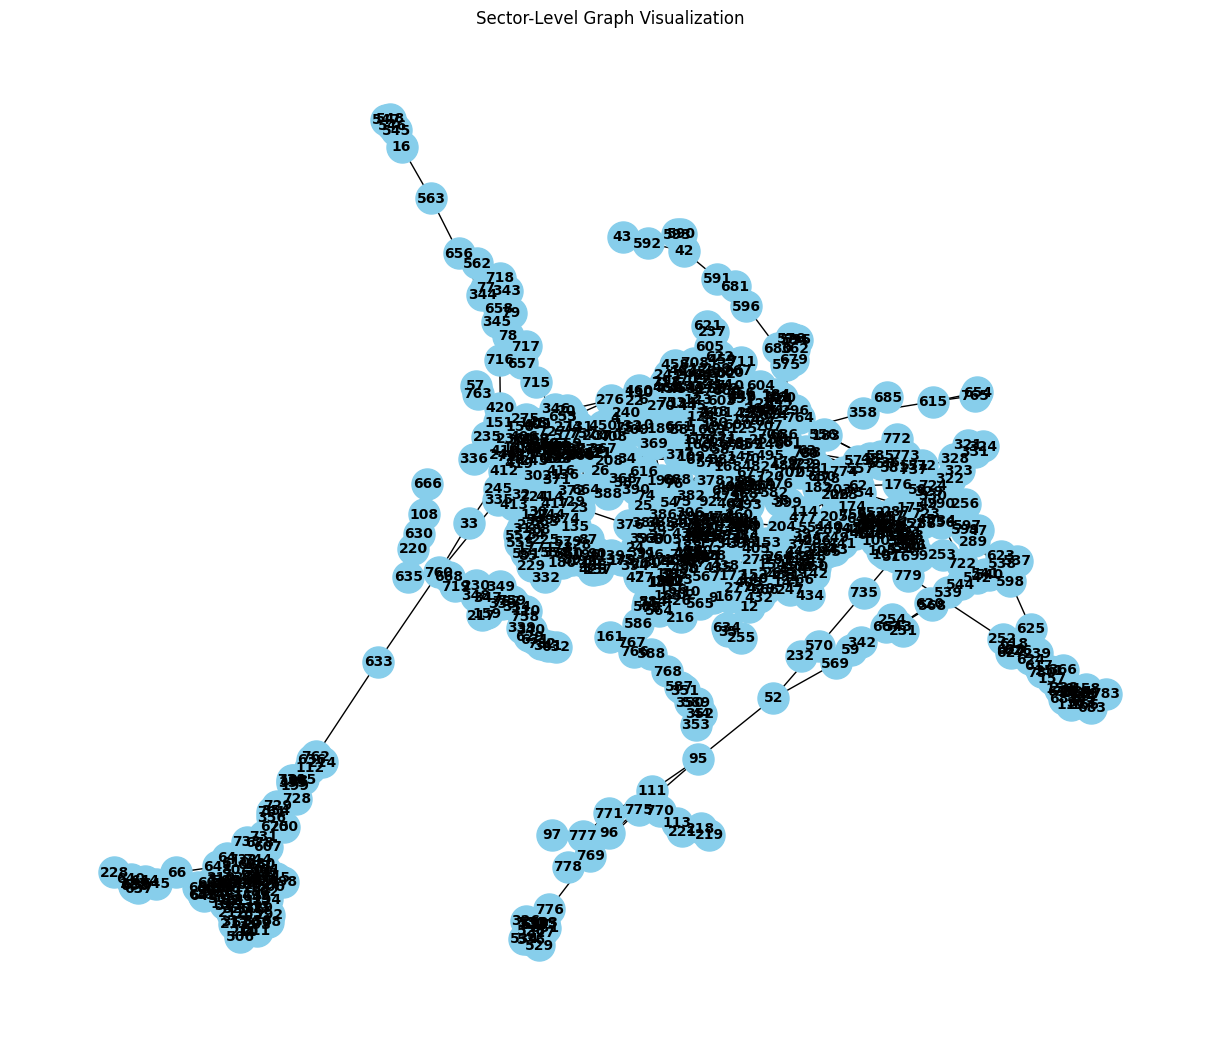

In [43]:
import torch
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

# Load the saved graph
import torch

# Load graph safely (only if file is from a trusted source — which in this case is yours)
graph_data = torch.load('sector_level_graph.pt', weights_only=False)


# Convert PyG Data object to NetworkX graph
G = to_networkx(graph_data, to_undirected=True)

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for consistent plotting
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title("Sector-Level Graph Visualization")
plt.show()


In [45]:
data.sector_names = sector_names  # list of sector names, same order as node features


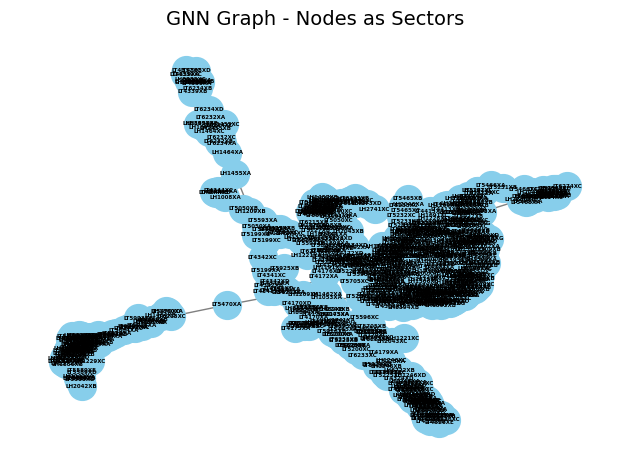

In [ ]:
import torch
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Load the saved graph
graph_data = torch.load('sector_level_graph.pt', weights_only=False)

# Load the original CSV file to get sector names
df = pd.read_csv('D:/pyproject/github/ML_based-Pro-LTE-Opt/Data/Sectors_with_Target_NBR_Cells.csv')

# Get the ordered list of sector names used to create nodes (e.g., 'Source' column)
sector_names = df['Source'].unique().tolist()  # must match node order!

# Convert the PyG graph to a NetworkX graph
G_nx = to_networkx(graph_data, to_undirected=True)

# Create a mapping from node index to sector name
labels = {i: name for i, name in enumerate(sector_names)}

# Create layout
pos = nx.spring_layout(G_nx, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G_nx, pos, node_size=400,node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G_nx, pos, edge_color='gray')

# Draw sector name labels
nx.draw_networkx_labels(G_nx, pos, labels, font_size=4, font_weight='bold')

# Display
plt.title("GNN Graph - Nodes as Sectors", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\hossein.hab\AppData\Local\Temp\ipykernel_21320\745357978.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


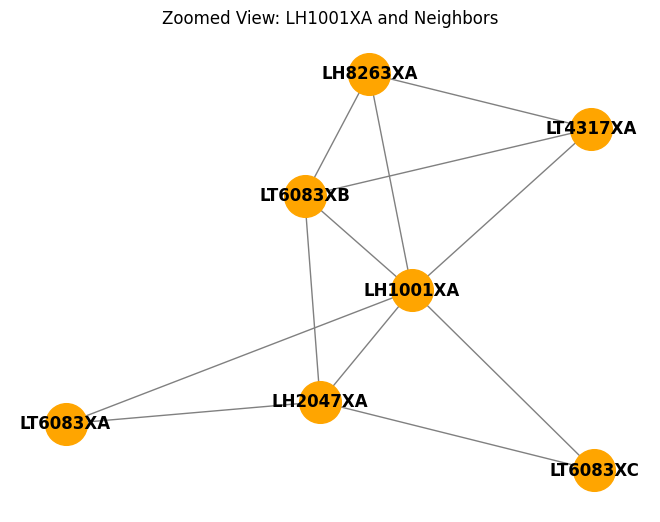

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# The sector name you want to zoom in on
target_sector = 'LH1001XA'

# Find its node index from the label dictionary
inv_labels = {v: k for k, v in labels.items()}
target_node = inv_labels[target_sector]

# Get neighbors of the node
neighbors = list(G_nx.neighbors(target_node))

# Include the node itself
nodes_to_draw = [target_node] + neighbors

# Create subgraph
subgraph = G_nx.subgraph(nodes_to_draw)

# Generate positions for the subgraph
pos_sub = nx.spring_layout(subgraph, seed=42)

# Draw the subgraph
nx.draw(subgraph, pos_sub, with_labels=True, labels={i: labels[i] for i in nodes_to_draw},
        node_color='orange', node_size=900, edge_color='gray', font_weight='bold')

plt.title(f"Zoomed View: {target_sector} and Neighbors")
plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\hossein.hab\AppData\Local\Temp\ipykernel_21320\3223106001.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


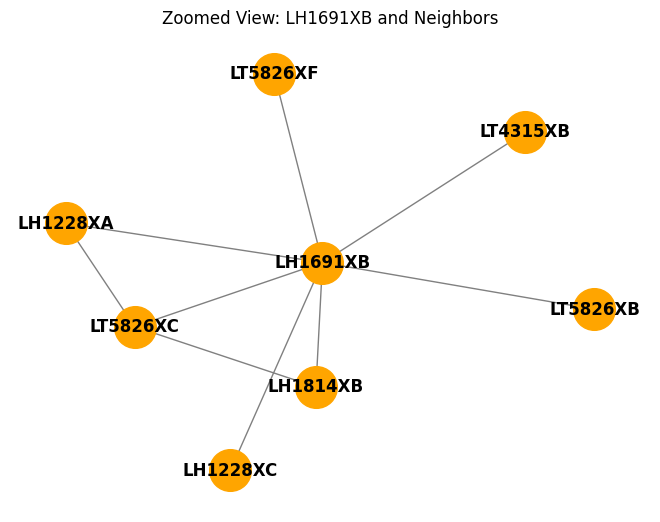

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

# The sector name you want to zoom in on
target_sector = 'LH1691XB'

# Find its node index from the label dictionary
inv_labels = {v: k for k, v in labels.items()}
target_node = inv_labels[target_sector]

# Get neighbors of the node
neighbors = list(G_nx.neighbors(target_node))

# Include the node itself
nodes_to_draw = [target_node] + neighbors

# Create subgraph
subgraph = G_nx.subgraph(nodes_to_draw)

# Generate positions for the subgraph
pos_sub = nx.spring_layout(subgraph, seed=42)

# Draw the subgraph
nx.draw(subgraph, pos_sub, with_labels=True, labels={i: labels[i] for i in nodes_to_draw},
        node_color='orange', node_size=900, edge_color='gray', font_weight='bold')

plt.title(f"Zoomed View: {target_sector} and Neighbors")
plt.axis('off')
plt.tight_layout()
plt.show()


Graph successfully loaded and converted to NetworkX format.
Found 341 at index 154.
Neighbors of 341: [263]


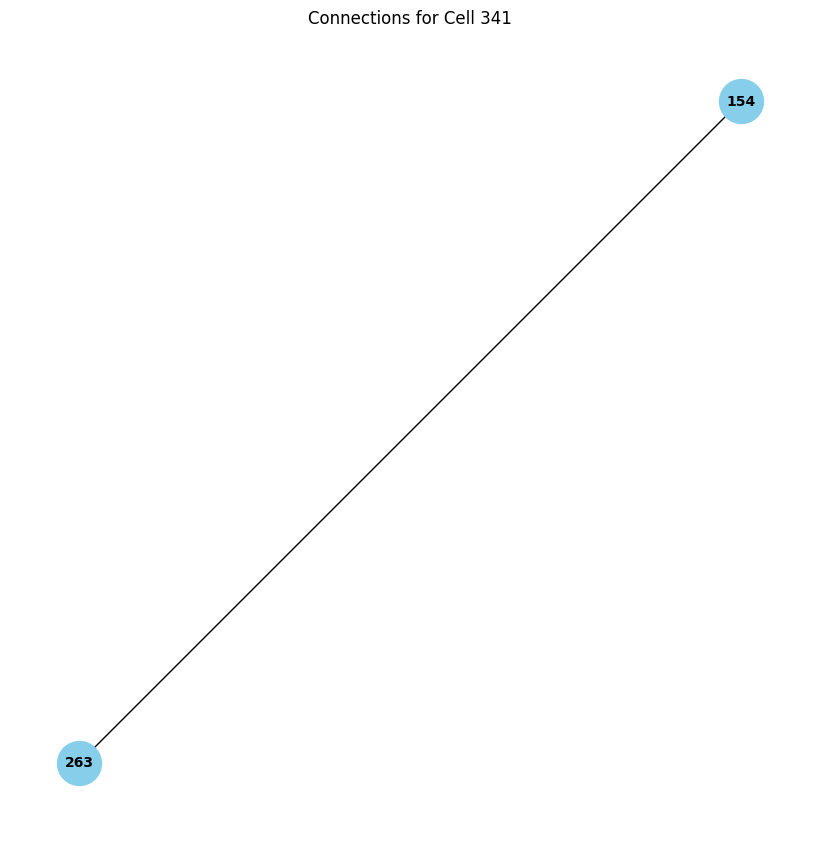

In [73]:
import torch
import torch_geometric

# Add safe globals for torch_geometric
torch.serialization.add_safe_globals([torch_geometric.data.data.DataTensorAttr])

# Now, load the graph data again with weights_only=False
graph_data = torch.load('D:/pyproject/github/ML_based-Pro-LTE-Opt/Output/sector_level_graph.pt', weights_only=False)

# Convert PyTorch Geometric data to NetworkX graph
import networkx as nx
from torch_geometric.utils import to_networkx

G_nx = to_networkx(graph_data, to_undirected=True)

# Now you can visualize or explore the graph
print("Graph successfully loaded and converted to NetworkX format.")

import matplotlib.pyplot as plt

# Specify the target cell name (adjust as necessary)
target_cell = '341'

# Get the node index for this target cell (assuming it's stored in node features)
node_indices = list(G_nx.nodes())
node_features = graph_data.x.numpy()

# Find the node index that corresponds to the target cell
target_cell_index = -1
for idx, feature in enumerate(node_features):
    if str(target_cell) in str(feature):  # Adjust based on your actual data
        target_cell_index = idx
        break

if target_cell_index == -1:
    print(f"Cell {target_cell} not found in the graph.")
else:
    print(f"Found {target_cell} at index {target_cell_index}.")

# Extract neighbors and create a subgraph
neighbors = list(G_nx.neighbors(target_cell_index))
print(f"Neighbors of {target_cell}: {neighbors}")

# Create subgraph for visualization
subgraph_nodes = [target_cell_index] + neighbors
subgraph = G_nx.subgraph(subgraph_nodes)

# Plot the subgraph
plt.figure(figsize=(8, 8))
nx.draw(subgraph, with_labels=True, node_size=1000, font_size=10, node_color='skyblue', font_weight='bold')
plt.title(f"Connections for Cell {target_cell}")
plt.show()



In [69]:
import torch
from torch_geometric.utils import to_networkx

# Allow safe globals for PyTorch Geometric
torch.serialization.add_safe_globals([torch_geometric.data.storage.GlobalStorage])

# Load the graph data again
graph_data = torch.load('D:/pyproject/github/ML_based-Pro-LTE-Opt/Output/sector_level_graph.pt', weights_only=False)

# Convert PyG Data object to NetworkX graph
G_nx = to_networkx(graph_data, to_undirected=True)

# Now you can access the graph and start querying it
print("Graph loaded successfully.")

# Find node index for 'LH1383XC' (you may need to adjust this based on your specific feature structure)
def find_node_index(node_name, node_features):
    for idx, feature in enumerate(node_features):
        if node_name in str(feature):  # Assuming node names are included as string in the feature
            return idx
    return -1

# Get node features from graph data
node_features = graph_data.x.numpy()  # Assuming the 'x' field contains node features

# Search for the specific node
target_node_name = 'LH1691XB'
target_node_index = find_node_index(target_node_name, node_features)

if target_node_index == -1:
    print(f"Node {target_node_name} not found in the graph.")
else:
    print(f"Node {target_node_name} found at index {target_node_index}.")

    # Get the features of this node (target node)
    target_node_features = node_features[target_node_index]
    print(f"Features for {target_node_name}: {target_node_features}")
    
    # Now, let's find its neighbors (edges)
    neighbors = list(G_nx.neighbors(target_node_index))
    print(f"Neighbors of {target_node_name}: {neighbors}")
    
    # If needed, we can also check edge features for each of the neighbors
    for neighbor in neighbors:
        edge_data = G_nx.get_edge_data(target_node_index, neighbor)  # Edge data between target_node and its neighbors
        print(f"Edge data for {target_node_name} and neighbor {neighbor}: {edge_data}")





Graph loaded successfully.
Node LH1691XB not found in the graph.


In [78]:
import pandas as pd
import numpy as np

# Load the uploaded CSV file

try:
    df = pd.read_csv('D:/pyproject/github/ML_based-Pro-LTE-Opt/Data/1ec1ac5f-6556-4cb1-8dbd-eb5fde8a305b.csv')
    print("--- Original Data Loaded Successfully ---")
    print("Original DataFrame head:")
    print(df.head())

    # Identify the columns to group by and the columns to aggregate (KPIs)
    # The grouping column is 'element'.
    grouping_col = 'element'
    
    # We assume that all columns that are numeric are KPIs to be averaged.
    # We will exclude any non-numeric columns except for the grouping column.
    kpi_cols = df.select_dtypes(include=np.number).columns.tolist()

    # Ensure the grouping column is not in the list of KPIs to be averaged
    if grouping_col in kpi_cols:
        kpi_cols.remove(grouping_col)
        
    print(f"\nGrouping by: '{grouping_col}'")
    print(f"Calculating average for KPIs: {kpi_cols}")

    # Group by the 'element' column and calculate the mean for all numeric KPI columns
    df_avg = df.groupby(grouping_col)[kpi_cols].mean().reset_index()

    # Rename the aggregated columns by adding the " Avg BH" suffix
    # We create a mapping for renaming, excluding the grouping column itself.
    rename_mapping = {col: f"{col} Avg BH" for col in df_avg.columns if col != grouping_col}
    df_avg.rename(columns=rename_mapping, inplace=True)
    
    print("\n--- Aggregated Data with Averages (Avg BH) ---")
    print(df_avg.head())
    
    # Save the resulting DataFrame to a new CSV file
    output_filename = "cell_kpi_average_bh.csv"
    df_avg.to_csv(output_filename, index=False)
    print(f"\nSuccessfully saved the aggregated data to: {output_filename}")

except FileNotFoundError:
    print(f"Error: The file '{df}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")



--- Original Data Loaded Successfully ---
Original DataFrame head:
                  time layer    element     city   network province    site  \
0  2025-05-24 00:00:00  Cell  LH8391XC5  ARDEBIL  Irancell  ARDEBIL  H8391X   
1  2025-05-24 00:00:00  Cell  LH1504XA3  ARDEBIL  Irancell  ARDEBIL  H1504X   
2  2025-05-24 00:00:00  Cell  LT4300XC2  ARDEBIL  Irancell  ARDEBIL  T4300X   
3  2025-05-24 00:00:00  Cell  LH8395XC3  ARDEBIL  Irancell  ARDEBIL  H8395X   
4  2025-05-24 00:00:00  Cell  LH8395XD2  ARDEBIL  Irancell  ARDEBIL  H8395X   

      subregion region  L.RA.TA.UE.Index3 [1526728959]  ...  \
0  R2LM_AR_EA_1     R2                             0.0  ...   
1  R2LM_AR_EA_1     R2                           248.0  ...   
2  R2LM_AR_EA_1     R2                          1218.0  ...   
3  R2LM_AR_EA_1     R2                         11697.0  ...   
4  R2LM_AR_EA_1     R2                          1377.0  ...   

   HOSR_Inter_Freq_Out  Cell_Availability_System  HOSR_Intra_Freq_Out  \
0     